In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,cohen_kappa_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

In [3]:
train=pd.read_csv("C://Users//abhis//Downloads//train (1).csv")

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
def title(name):
    for i in ('Mr.','Mrs.','Miss.','Master.'):
        if name.find(i) != -1:
            return i


In [6]:
train["title"]=train.Name.apply(title)

In [7]:
train.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs.


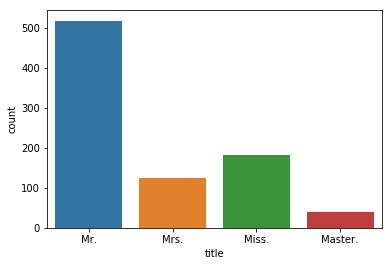

In [8]:
sns.countplot(train.title)

In [12]:
train[(train.title=="Mr.") & (train.Sex=="female")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title


In [11]:
train.Age.fillna(value=28,inplace=True)

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title           27
dtype: int64

In [11]:
train[train.title.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title


In [9]:
def impute_title(cols):
    title = cols[0]
    Sex = cols[1]
    
    if pd.isnull(title):

        if Sex == "male":
            return "Mr."
        else:
            return "Mrs."

    else:
        return title

In [10]:
train['title'] = train[['title','Sex']].apply(impute_title,axis=1)

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
title            0
dtype: int64

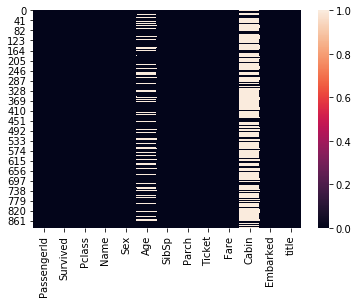

In [24]:
sns.heatmap(train.isnull())

In [26]:
train.Age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
19.00     25
30.00     25
21.00     24
25.00     23
36.00     22
29.00     20
32.00     18
26.00     18
35.00     18
27.00     18
16.00     17
31.00     17
34.00     15
23.00     15
33.00     15
20.00     15
39.00     14
17.00     13
42.00     13
40.00     13
45.00     12
38.00     11
50.00     10
2.00      10
4.00      10
        ... 
28.50      2
63.00      2
0.83       2
30.50      2
70.00      2
57.00      2
0.75       2
13.00      2
59.00      2
10.00      2
64.00      2
40.50      2
45.50      2
32.50      2
20.50      1
24.50      1
0.67       1
70.50      1
0.92       1
74.00      1
34.50      1
14.50      1
80.00      1
12.00      1
53.00      1
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [29]:
# lets impute the age with respect to pclass
train[train.Age.isnull()]["Pclass"].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [31]:
train.groupby('Pclass')["Age"].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [38]:
def imp_func(cols):
    age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [39]:
train["Age"]=train[["Age","Pclass"]].apply(imp_func,axis=1)

In [40]:
train.Age.value_counts(dropna=False)

24.00    166
37.00     36
29.00     31
22.00     27
18.00     26
30.00     25
19.00     25
28.00     25
21.00     24
25.00     23
36.00     22
32.00     18
26.00     18
27.00     18
35.00     18
31.00     17
16.00     17
34.00     15
23.00     15
20.00     15
33.00     15
39.00     14
40.00     13
17.00     13
42.00     13
45.00     12
38.00     11
50.00     10
4.00      10
2.00      10
        ... 
28.50      2
45.50      2
0.83       2
30.50      2
70.00      2
57.00      2
0.75       2
13.00      2
10.00      2
63.00      2
64.00      2
32.50      2
71.00      2
40.50      2
20.50      1
0.67       1
0.92       1
74.00      1
34.50      1
14.50      1
24.50      1
80.00      1
12.00      1
53.00      1
66.00      1
36.50      1
70.50      1
55.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [42]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
title            0
dtype: int64

In [12]:
train.Embarked.fillna(value='S',inplace=True)

In [13]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.


In [43]:
train["family"]=train.SibSp+train.Parch+1

In [44]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,Mr.,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master.,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs.,2


In [45]:
newtrain=train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [46]:
train.PassengerId.nunique()

891

In [47]:
newtrain.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,family
0,0,3,male,22.0,1,0,7.2500,S,Mr.,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,2
2,1,3,female,26.0,0,0,7.9250,S,Miss.,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,2
4,0,3,male,35.0,0,0,8.0500,S,Mr.,1
5,0,3,male,24.0,0,0,8.4583,Q,Mr.,1
6,0,1,male,54.0,0,0,51.8625,S,Mr.,1
7,0,3,male,2.0,3,1,21.0750,S,Master.,5
8,1,3,female,27.0,0,2,11.1333,S,Mrs.,3
9,1,2,female,14.0,1,0,30.0708,C,Mrs.,2


In [48]:
ohe_train=pd.get_dummies(newtrain)

In [49]:
ohe_train.head(19)

,Survived,Pclass,Age,SibSp,Parch,Fare,family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master.,title_Miss.,title_Mr.,title_Mrs.
0,0,3,22.0,1,0,7.2500,2,0,1,0,0,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,2,1,0,1,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,2,1,0,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1,0,0,1,0
5,0,3,24.0,0,0,8.4583,1,0,1,0,1,0,0,0,1,0
6,0,1,54.0,0,0,51.8625,1,0,1,0,0,1,0,0,1,0
7,0,3,2.0,3,1,21.0750,5,0,1,0,0,1,1,0,0,0
8,1,3,27.0,0,2,11.1333,3,1,0,0,0,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,2,1,0,1,0,0,0,0,0,1


In [52]:
a=ohe_train.drop("Survived",axis=1)

In [50]:
std=StandardScaler()
scaled_train=std.fit_transform(ohe_train.drop("Survived",axis=1))

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [53]:
scaled_train=pd.DataFrame(scaled_train,columns=a.columns)

In [54]:
scaled_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master.,title_Miss.,title_Mr.,title_Mrs.
0,0.827377,-0.533834,0.432793,-0.473674,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029
1,-1.566107,0.674891,0.432793,-0.473674,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803,-0.216803,-0.506655,-1.231645,2.397916
2,0.827377,-0.231653,-0.474545,-0.473674,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,1.973729,-1.231645,-0.417029
3,-1.566107,0.448255,0.432793,-0.473674,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.231645,2.397916
4,0.827377,0.448255,-0.474545,-0.473674,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029
5,0.827377,-0.382743,-0.474545,-0.473674,-0.478116,-0.560975,-0.737695,0.737695,-0.482043,3.251373,-1.623803,-0.216803,-0.506655,0.811922,-0.417029
6,-1.566107,1.883615,-0.474545,-0.473674,0.395814,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029
7,0.827377,-2.044739,2.247470,0.767630,-0.224083,1.919564,-0.737695,0.737695,-0.482043,-0.307562,0.615838,4.612483,-0.506655,-1.231645,-0.417029
8,0.827377,-0.156107,-0.474545,2.008933,-0.424256,0.679295,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.231645,2.397916
9,-0.369365,-1.138196,0.432793,-0.473674,-0.042956,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803,-0.216803,-0.506655,-1.231645,2.397916


In [55]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [56]:
wcss=[]
for i in range(1,11):
    k=KMeans(n_clusters=i)
    k.fit_predict(scaled_train)
    wcss.append(k.inertia_)

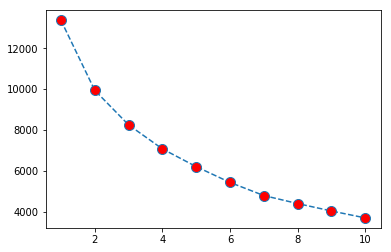

In [57]:
plt.plot(range(1,11),wcss,"o-",linestyle="dashed",markerfacecolor="red",markersize=10)

In [58]:
wcss

[13365.0,
 9943.965318274968,
 8256.411116580153,
 7083.502392273394,
 6216.082556186027,
 5444.606202760366,
 4804.604574279278,
 4412.875816664011,
 4050.3160371539343,
 3712.2314175246574]

In [60]:
k.cluster_centers_

array([[-1.46841369e+00,  4.45171247e-01, -1.16173585e-02,
        -6.83500214e-02,  1.86086719e+00, -4.20866061e-02,
         1.27013400e+00, -1.27013400e+00,  2.07450510e+00,
        -3.07562343e-01, -1.62380254e+00, -2.16802964e-01,
         5.56366360e-01, -1.14823399e+00,  1.07661524e+00],
       [-3.82964183e-01,  2.56386929e-01, -2.47710556e-01,
        -2.05664902e-01,  1.46209289e-01, -2.72048433e-01,
        -7.37695132e-01,  7.37695132e-01,  2.07450510e+00,
        -3.07562343e-01, -1.62380254e+00, -2.16802964e-01,
        -5.06655284e-01,  8.11922334e-01, -4.17028828e-01],
       [-1.12130013e+00,  1.09607207e+00, -1.85481584e-01,
        -3.08898810e-01,  8.83074415e-02, -2.81091025e-01,
        -7.37695132e-01,  7.37695132e-01, -4.82042680e-01,
        -3.07562343e-01,  6.15838425e-01, -2.16802964e-01,
        -5.06655284e-01,  8.11922334e-01, -4.17028828e-01],
       [-2.26451716e-02, -5.91375175e-01, -2.03191608e-01,
         1.41177651e-01,  8.26631415e-03, -6.83444556

In [61]:
k=KMeans(n_clusters=2)
labels=k.fit_predict(scaled_train)

In [62]:
labels.shape

(891,)

In [64]:
from sklearn.metrics import adjusted_rand_score,silhouette_score

In [65]:
adjusted_rand_score(ohe_train.Survived,labels)

0.32508829767576763

In [66]:
silhouette_score(scaled_train,labels)

0.3452667569526871

In [67]:
scaled_train["Labels"]=labels

In [51]:
scaled_train.head()

,Pclass,Age,SibSp,Parch,Fare,family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master.,title_Miss.,title_Mr.,title_Mrs.,Labels
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029,0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803,-0.216803,-0.506655,-1.231645,2.397916,1
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,1.973729,-1.231645,-0.417029,1
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.231645,2.397916,1
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029,0


In [68]:
k.cluster_centers_

array([[ 0.09730235,  0.05785069, -0.08456259, -0.18109601, -0.13450604,
        -0.1482682 , -0.73769513,  0.73769513, -0.0611206 , -0.05467437,
         0.08795078,  0.1179829 , -0.50665528,  0.6702539 , -0.41702883],
       [-0.17880081, -0.10630524,  0.15539049,  0.33277834,  0.24716556,
         0.27245462,  1.35557354, -1.35557354,  0.11231397,  0.1004685 ,
        -0.16161656, -0.21680296,  0.93101942, -1.2316449 ,  0.76632367]])

In [69]:
scaled_train.head()

,Pclass,Age,SibSp,Parch,Fare,family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master.,title_Miss.,title_Mr.,title_Mrs.,Labels
0,0.827377,-0.533834,0.432793,-0.473674,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029,0
1,-1.566107,0.674891,0.432793,-0.473674,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803,-0.216803,-0.506655,-1.231645,2.397916,1
2,0.827377,-0.231653,-0.474545,-0.473674,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,1.973729,-1.231645,-0.417029,1
3,-1.566107,0.448255,0.432793,-0.473674,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.231645,2.397916,1
4,0.827377,0.448255,-0.474545,-0.473674,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029,0


In [71]:
from sklearn.decomposition import PCA
pca=PCA()
new_t=pca.fit_transform(scaled_train)

In [77]:
sum((np.cumsum(pca.explained_variance_ratio_))<0.95)

8

In [78]:
pca=PCA(n_components=8)
new_t=pca.fit_transform(scaled_train)

In [79]:
x=new_t
y=ohe_train.Survived

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, 
                                                    random_state=100)

In [81]:
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=5)
predict_dtree=dtree.fit(x_train,y_train).predict(x_test)

In [82]:
rf=RandomForestClassifier()
predict_rf=rf.fit(x_train,y_train).predict(x_test)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
#using kmeans random forest
accuracy_score(y_test,predict_rf)

0.8171641791044776

In [84]:
cohen_kappa_score(y_test,predict_rf)

0.6139009761260732

In [85]:
#decision tree
accuracy_score(y_test,predict_dtree)

0.8208955223880597

In [86]:
cohen_kappa_score(y_test,predict_dtree)

0.6212237206289382

In [87]:
#now doing a agglomerative clustering rather than K means
from sklearn.cluster import AgglomerativeClustering

In [92]:
ag=AgglomerativeClustering(n_clusters=2)

In [89]:
scaled_hie=scaled_train.drop("Labels",axis=1)

In [90]:
scaled_hie.head()

,Pclass,Age,SibSp,Parch,Fare,family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master.,title_Miss.,title_Mr.,title_Mrs.
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803,-0.216803,-0.506655,-1.231645,2.397916
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,1.973729,-1.231645,-0.417029
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.231645,2.397916
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029


In [93]:
labels_hie=ag.fit_predict(scaled_hie)

In [95]:
scaled_hie["labels hie"]=labels_hie

In [96]:
scaled_hie.head()

,Pclass,Age,SibSp,Parch,Fare,family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master.,title_Miss.,title_Mr.,title_Mrs.,labels hie
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029,1
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803,-0.216803,-0.506655,-1.231645,2.397916,0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,1.973729,-1.231645,-0.417029,0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.231645,2.397916,0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.811922,-0.417029,1


In [97]:
x=scaled_hie
y=ohe_train.Survived

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, 
                                                    random_state=100)

In [99]:
rf=RandomForestClassifier()
predict_rf=rf.fit(x_train,y_train).predict(x_test)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [100]:
#using hierarchy random forest
accuracy_score(y_test,predict_rf)

0.832089552238806

In [101]:
cohen_kappa_score(y_test,predict_rf)

0.6464587242026266

In [105]:
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=5)
predict_dtree=dtree.fit(x_train,y_train).predict(x_test)

In [106]:
#decision tree
accuracy_score(y_test,predict_dtree)

0.8134328358208955

In [107]:
cohen_kappa_score(y_test,predict_dtree)

0.6065997299042922

In [112]:
lr=LogisticRegression()
predict_lr=lr.fit(x_train,y_train).predict(x_test)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
accuracy_score(y_test,predict_lr)

0.8246268656716418

In [114]:
cohen_kappa_score(y_test,predict_lr)

0.6307457786116322